# Logistic Regression

Logistic Regression is a Machine Learning algorithm which is used for the classification problems, it is a predictive analysis algorithm and based on the concept of probability. In other words, given some inpuot parameters we would like to predict if a given data point belongs to a certain class. This problem is similar to linear regression, as the line or curve we are trying to fit here is nothing but the decision boundary.

The sample problem goes as follows: We would like to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through two tests to ensure it is functioning correctly.
From these two tests, we would like to determine whether the microchips should be accepted or rejected. The data can be seen below:

In [78]:
import numpy as np

pwd = %pwd
pwd = pwd.replace("Notebooks", "")
raw_data = np.genfromtxt( pwd + 'Data\\ex2data2.txt', delimiter=',')

ones = np.ones((len(raw_data), 1))
X = raw_data[:, 0:2].astype(np.float64)
X = np.column_stack((ones, X)).astype(np.float64)
y = np.array(raw_data[:, 2]).reshape(len(raw_data), 1).astype(np.float64)

theta = np.array([[1.], [1.], [1.], [1.], [1.], [1.], [1.]]).astype(np.float64)
lam = 1

<IPython.core.display.Javascript object>


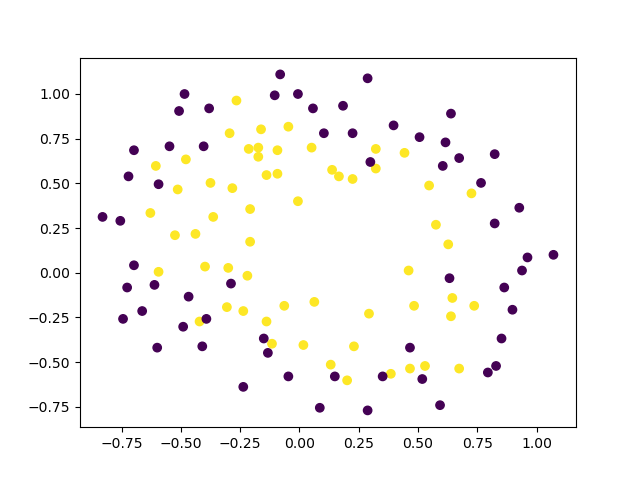

In [79]:
import matplotlib.pyplot as plt

plt.scatter(X[:,1],X[:,2],c=y[:,0])
plt.show()

As we can see no linear equation would really do justice for this dataset. In order to achive get a curve, let us map the input parameters to some higher powers.

In [80]:
non_lin_X = np.zeros((len(X), 7))

non_lin_X[:, 0:1] = X[:, 1:2]**2
non_lin_X[:, 1:2] = X[:, 2:3]**2
non_lin_X[:, 2:3] = np.multiply(X[:, 1:2], X[:, 2:3])

non_lin_X[:, 3:4] = X[:, 1:2]**3
non_lin_X[:, 4:5] = X[:, 2:3]**3
non_lin_X[:, 5:6] = np.multiply(X[:, 1:2] ** 2, X[:, 2:3])
non_lin_X[:, 6:7] = np.multiply(X[:, 1:2], X[:, 2:3] ** 2)
X = non_lin_X

But now we have given our model too much freedom to fit to our training data. In order to discourage this, we will penalise overfitting by introducing regularization.

Furthermore, we need to redefine our cost function for logistic regression. Take: 
$$$$
$$ J(\theta) =  \frac{1}{m} [-y^T \; log(sigmoid(X \theta))\; - (\mathbb{1} - y)^Tlog(1 - sigmoid(X \theta)) ]$$

Where $m$ is the batch size, $log$ is the natural logarithm and $\mathbb{1}$ is the appropriate sized vector of $1$s. Moreover, any function over an array is defined element-wise. Having redefined the cost function we can now add the penalising terms:

$$ J(\theta) =  \frac{1}{m} [-y^T \; log(sigmoid(X \theta))\; - (\mathbb{1} - y)^Tlog(1 - sigmoid(X \theta)) ] + \frac{\lambda}{2m} \theta^T \theta$$

Note that for compactness we will omit the standard of not penalising $\theta_0$.

In [91]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def regularized_cost_function(theta, X, y, lam):
    m = len(X)
    first_term = np.dot(-y.T, np.log(sigmoid(np.dot(X, theta))))
    second_term = np.dot((1-y).T, np.log(1 - sigmoid(np.dot(X, theta))))
    penalty = (lam/(2*m)) * np.dot(theta.T, theta)

    cost = ((first_term - second_term) / m) + penalty 
    return cost

Despite of the non-linear nature and complexity of the cost function, the gradient is fairly simple and is as follows: 
$$$$
$$ \nabla J(\theta) = X^T \; (sigmoid(X\theta) - y) + \frac{\lambda}{m}\theta$$

In [98]:
def regularized_gradient(theta, X, y, lam):
    m = len(X)
    first_term = np.dot(X.T, (sigmoid(np.dot(X, theta)) - y))
    penalty = (lam / m) * theta

    gradient = (first_term / m) + penalty 
    return gradient 